# Classifcation Model

## KNN Vecinos Cercanos

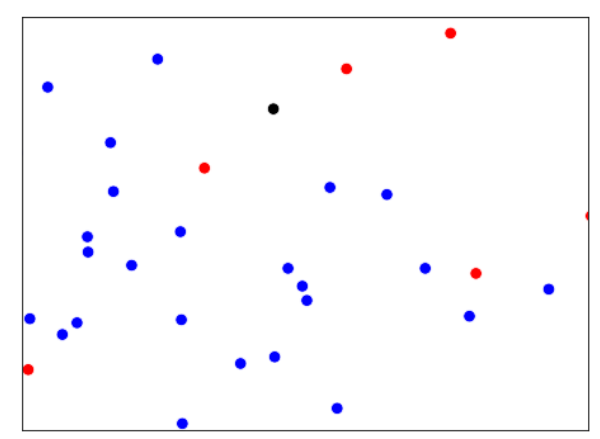

## Ejemplo

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import *
from itertools import product
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [34]:
df_diabetes = pd.read_csv('diabetes_clean.csv')

df_diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
#antes de dividir dataset en entramiento y test, tengo que eliminar la columna a predecir 
df_diabetes.shape

X = df_diabetes.drop(columns=['diabetes'])

# vemos que x es el dataset original sin la oclumna a predecir
X.head()

#guardamos en un array los valores a predecir

y = df_diabetes['diabetes']

y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

In [36]:
#separamos entre entrenamiento y test
#separamos dataset
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

#creamos KNN

knn = KNeighborsClassifier(n_neighbors= 3)

#entrenaomos modelo

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
#testeamos el modelo
# nos llega un paciente

data_predict = pd.DataFrame([{'pregnancies':2, 'glucose':148, 'diastolic':76,'triceps':30,'insulin':70,'bmi':30,'dpf':0.5,'age':45}])

knn.predict(data_predict)

array([0], dtype=int64)

In [39]:
# miramos la calidad del modelo
knn.score(x_test,y_test)

0.6948051948051948

In [40]:
#comprobamos la calidad real del modelo haciendo cross_val
from sklearn.model_selection import cross_val_score

# hecemos lo que equivaldria a un train split 5 veces

cv_scores = cross_val_score(knn, X,y,cv=5)

#miramos el resultado
print(cv_scores)
print(np.mean(cv_scores))

[0.68181818 0.69480519 0.75324675 0.75163399 0.68627451]
0.7135557253204311


In [41]:
# miramos para otro numero de n_neigghbords
knn = KNeighborsClassifier(n_neighbors= 8)
# hecemos lo que equivaldria a un train split 5 veces

cv_scores = cross_val_score(knn, X,y,cv=5)

#miramos el resultado
print(cv_scores)
print(np.mean(cv_scores))

[0.74025974 0.72077922 0.75974026 0.79084967 0.73856209]
0.7500381970970207


In [42]:
from sklearn.model_selection import GridSearchCV

#creamos modelo 
knn_opt = KNeighborsClassifier()

#creamos dict de parametro

param = {'n_neighbors': np.arange(1,50)}

#usamos grid_search que te calculo el modelo para todos los n_neighbords

knn_gsv = GridSearchCV(knn_opt, param,cv=5)

#etrenamos modelo

knn_gsv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [43]:
# dame la cantidad optima de vecinos

knn_gsv.best_params_

{'n_neighbors': 14}

In [44]:
#dame la accurracy con 14

knn_gsv.best_score_

0.7578558696205755

### Ejercicio

En este ejercicio, construiremos un modelo de clasificación utilizando el conjunto de datos telecom_churn.

Utilizando el método KNN queremos clasificar si una cliente se va a dara de bajar a partir de su  'account_length' y de su 'customer_service_calls'.

Obtén las predicciones de tu modelo.


In [45]:
df_churn = pd.read_csv('telecom_churn_clean.csv')

df_churn.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [46]:
df_churn_clean = df_churn[['account_length','customer_service_calls']]
df_churn_clean.head()
y_churn = df_churn['churn']

In [47]:
#separamos dataset
x_train, x_test, y_train, y_test = train_test_split(df_churn_clean,y_churn,test_size=0.2,random_state=42,stratify=y_churn)

#creamos KNN

knn = KNeighborsClassifier(n_neighbors= 3)

#entrenaomos modelo

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
#testeamos el modelo

data_predict = pd.DataFrame([{'account_length':69, 'customer_service_calls':2}])

knn.predict(data_predict)

array([0], dtype=int64)

In [49]:
# miramos la calidad del modelo
knn.score(x_test,y_test)

0.8500749625187406

Mediante Cross validation, indica la accuracy de tu modelo. Prueba para n_neighbors de 4 a 11. Muestra las acuracys en un gràfico

In [50]:
# Definir valores posibles para n_neighbors
neighbors = list(range(4, 12))

# Almacenar las acc para cada valor de n_neighbors
acc = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    accuracy = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy').mean()
    acc.append(accuracy)

print(acc)

[0.8556024893694911, 0.851852946974177, 0.8578468643518911, 0.8548407535693165, 0.8582199881726789, 0.8589690518430908, 0.8593421756638788, 0.8582157641294247]


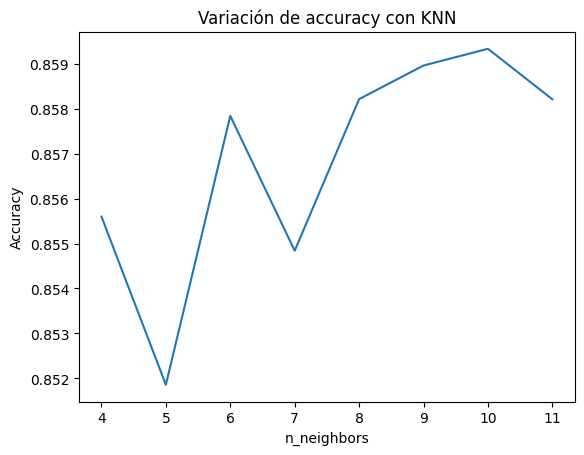

In [51]:
# Graficar los resultados
plt.plot(neighbors, acc)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Variación de accuracy con KNN')
plt.show()

Mediante GridSearchCV obtén el n_neighbors óptimo e indica su accuracy. Vuelve a generar el modelo y predice si un cliente con: account_length = 103 y customer_service_calls = 25 se darà de baja.

In [52]:
#creamos modelo 
knn_opt = KNeighborsClassifier()

#creamos dict de parametro

param = {'n_neighbors': np.arange(1,50)}

#usamos grid_search que te calculo el modelo para todos los n_neighbords

knn_gsv = GridSearchCV(knn_opt, param,cv=10)

#etrenamos modelo

knn_gsv.fit(df_churn_clean,y_churn)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [53]:
# cantidad optima de vecinos

knn_gsv.best_params_

{'n_neighbors': 7}

In [54]:
#mejor acc

knn_gsv.best_score_

0.858686231141321

In [55]:
data_predict = pd.DataFrame([{'account_length':103, 'customer_service_calls':25}])

knn_gsv.predict(data_predict)

array([1], dtype=int64)

## Linear regression SickitLearn

A partir del dataset(advertising_and_sales_clean) sales df, entrena tu modelo para predecir las ventas a partir de la inversión en los diferentes medios.

PD: Deberás hacer split en train/test.

Indica la accuracy de tu modelo

In [64]:
df_sales = pd.read_csv('advertising_and_sales_clean.csv')

df_sales.describe()

,tv,radio,social_media,sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54062.912451,18157.533110,3323.472829,192413.332112
std,26104.941838,9663.259642,2211.253915,93019.873216
min,10000.000000,0.680000,0.030000,31199.410000
25%,32000.000000,10555.355000,1530.822500,112434.610000
50%,53000.000000,17859.515000,3055.565000,188963.680000
75%,77000.000000,25640.605000,4804.922500,272324.240000
max,100000.000000,48871.160000,13981.660000,364079.750000


In [65]:
#antes de dividir dataset en entramiento y test, tengo que eliminar la columna a predecir 
X = df_sales[['tv','radio','social_media']]
y = df_sales['sales']

y.head()

0     54732.76
1     46677.90
2    150177.83
3    298246.34
4     56594.18
Name: sales, dtype: float64

In [66]:
#separamos dataset
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [67]:
from sklearn.linear_model import LinearRegression

# Crear una instancia del modelo de regresión lineal
reg = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
reg.fit(x_train,y_train)

LinearRegression()

In [74]:
# Hacer predicciones en los datos de prueba
y_pred = reg.predict(x_test)

# Calcular el R2 score
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.9990254908339555


Mediante cross validation obtén el valor de tu modelo.
Al ser una regressión el método cross_val_score te da el Rsquared.

In [75]:

scores = cross_val_score(reg, X, y, cv=5, scoring='r2')

# Calcular la media y la desviación estándar de los valores de R2 score
mean_score = np.mean(scores)
std_score = np.std(scores)

print('R2 score:', mean_score, '+/-', std_score)

R2 score: 0.9989926582211209 +/- 2.456588752915554e-05
